In [22]:
import pandas as pd
df = pd.read_csv('grow_70-3.csv')
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1
0,1971Q1,George Harrison,1.0,False,1.0,1,My Sweet Lord/Isn't It A Pity,7.0,5072.996
1,1971Q1,Dawn,3.0,False,2.0,2,Knock Three Times,8.0,5072.996
2,1971Q1,The 5th Dimension,2.0,False,2.0,3,One Less Bell To Answer,12.0,5072.996
3,1971Q1,Santana,5.0,False,4.0,4,Black Magic Woman,9.0,5072.996
4,1971Q1,The Partridge Family Starring Shirley Jones Fe...,6.0,False,1.0,5,I Think I Love You,14.0,5072.996
...,...,...,...,...,...,...,...,...,...
9115,1973Q1,The Carpenters,NaN,NaN,NaN,96,Sing,NaN,5646.286
9116,1973Q1,Demis Roussos,NaN,NaN,NaN,97,Schines Maedchen aus Arcadia,NaN,5646.286
9117,1973Q1,Steely Dan,NaN,NaN,NaN,98,Reelin' in the Years,NaN,5646.286
9118,1973Q1,Eddie Kendricks,NaN,NaN,NaN,99,Keep On Truckin',NaN,5646.286


In [23]:
df['rank_gain/loss'] = df['track_lp'] - df['track_rank']
df.dropna(inplace=True)
df



,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss
0,1971Q1,George Harrison,1.0,False,1.0,1,My Sweet Lord/Isn't It A Pity,7.0,5072.996,0.0
1,1971Q1,Dawn,3.0,False,2.0,2,Knock Three Times,8.0,5072.996,1.0
2,1971Q1,The 5th Dimension,2.0,False,2.0,3,One Less Bell To Answer,12.0,5072.996,-1.0
3,1971Q1,Santana,5.0,False,4.0,4,Black Magic Woman,9.0,5072.996,1.0
4,1971Q1,The Partridge Family Starring Shirley Jones Fe...,6.0,False,1.0,5,I Think I Love You,14.0,5072.996,1.0
...,...,...,...,...,...,...,...,...,...,...
8815,1973Q4,El Chicano,45.0,False,40.0,45,Tell Her She's Lovely,8.0,5731.632,0.0
8816,1973Q4,The Temptations,65.0,False,46.0,46,Let Your Hair Down,3.0,5731.632,19.0
8817,1973Q4,Tom T. Hall,57.0,False,47.0,47,I Love,5.0,5731.632,10.0
8818,1973Q4,David Essex,52.0,False,48.0,48,Rock On,9.0,5731.632,4.0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="rank_gain/loss")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

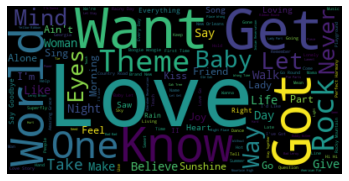

In [25]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.track_title)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [26]:
df = df[df['rank_gain/loss'] != 0]
df['sentiment'] = df['rank_gain/loss'].apply(lambda rating : +1 if rating > 0 else -1)

C:\Users\java\AppData\Local\Temp\ipykernel_16036\701095560.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss,sentiment
1,1971Q1,Dawn,3.0,False,2.0,2,Knock Three Times,8.0,5072.996,1.0,1
2,1971Q1,The 5th Dimension,2.0,False,2.0,3,One Less Bell To Answer,12.0,5072.996,-1.0,-1
3,1971Q1,Santana,5.0,False,4.0,4,Black Magic Woman,9.0,5072.996,1.0,1
4,1971Q1,The Partridge Family Starring Shirley Jones Fe...,6.0,False,1.0,5,I Think I Love You,14.0,5072.996,1.0,1
5,1971Q1,Smokey Robinson & The Miracles,4.0,False,1.0,6,The Tears Of A Clown,13.0,5072.996,-2.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
8814,1973Q4,Isaac Hayes,62.0,False,44.0,44,"""Joy"" Pt. I",3.0,5731.632,18.0,1
8816,1973Q4,The Temptations,65.0,False,46.0,46,Let Your Hair Down,3.0,5731.632,19.0,1
8817,1973Q4,Tom T. Hall,57.0,False,47.0,47,I Love,5.0,5731.632,10.0,1
8818,1973Q4,David Essex,52.0,False,48.0,48,Rock On,9.0,5731.632,4.0,1


In [28]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

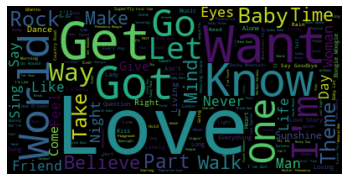

In [29]:
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.track_title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

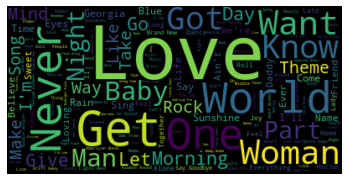

In [30]:
neg = " ".join(review for review in negative.track_title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [31]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

C:\Users\java\AppData\Local\Temp\ipykernel_16036\1108073838.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\java\AppData\Local\Temp\ipykernel_16036\1108073838.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df['track_title'].value_counts()[:8]

Why Me                                                      24
You've Got A Friend                                         21
Amazing Grace                                               21
I'd Like To Teach The World To Sing (In Perfect Harmony)    20
Playground In My Mind                                       20
Bad, Bad Leroy Brown                                        19
Me And Bobby McGee                                          19
Touch Me In The Morning                                     19
Name: track_title, dtype: int64

In [33]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['track_title'] = df['track_title'].apply(remove_punctuation)
df = df.dropna(subset=['track_title'])

C:\Users\java\AppData\Local\Temp\ipykernel_16036\3186846728.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
dfNew = df[['track_title','sentiment']]
dfNew.head()

,track_title,sentiment
1,Knock Three Times,1
2,One Less Bell To Answer,-1
3,Black Magic Woman,1
4,I Think I Love You,1
5,The Tears Of A Clown,-1


In [35]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['track_title'])
test_matrix = vectorizer.transform(test['track_title'])

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [38]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [39]:
lr.fit(X_train,y_train)

LogisticRegression()

In [40]:
predictions = lr.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[  30,   69],
       [ 477, 1139]], dtype=int64)

In [42]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.06      0.30      0.10        99
           1       0.94      0.70      0.81      1616

    accuracy                           0.68      1715
   macro avg       0.50      0.50      0.45      1715
weighted avg       0.89      0.68      0.77      1715

